## 3-5. 선분 검출 (line segment) / 직선 검출
앞에서는 에지를 검출하는 여러가지 방법들.

응용을 위해서는 에지 토막(edge segment)로 만들어야 한다.

게다가 에지 토막을 직선으로 근사화하여 선분(직선 토막)(line segment)로 변환해야하는 응용이 많다.

### - 에지 연결과 선분 근사

0. edge 검출
1. 세선화를 통해 edge의 두께를 1로 만든다.
2. 에지 추적
3. 선분 근사 (직선으로 근사하여 선분(line segment)로 변환한다.)


#### 연결된 에지를 표현하는 방법.
에지 열 : 화소의 좌표를 순서대로 배열에 저장.(메모리 많이 소모)

체인 코드 : 시작점만 좌표로 표현하고, 그 이후는 0~7 방향 코드 표시

(이미지)

하지만, 두께가 1 이상인 에지에서는 에지 토막(edge segment)을 만드는데 혼란을 줄 수 있다.

그래서, 세선화 작업이 필요하다.

---
#### 세선화
canny detection에서 세선화시에, 에지강도와 에지 방향을 이용했지만, edge 이진영상만으로도 할 수 있다.

---
##### SPTA(Safe point Thinning Algorithm)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/spta1.PNG" width="350" height="500">

p를 에지로 남길지 결정하는 과정.

만약 이웃화소 n4가 0일때, 4개의 마스크중 어느 하나라도 매치가 안되면 제거 대상.

보통 에지 두께는 2~3이므로, SPTA 과정은 2번만 하면된다. 


#### 에지 토막(Edge segment)  검출, 추적
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing.PNG" width="350" height="500">
SPTA로 세선화된 영상에서 토막 추적을 위해, 분기점과 끝점을 알아내야한다.

##### 분기점, 끝점 수집
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing2.PNG" width="150" height="250">

화소의 주변 여덟 이웃중, 에지 화소를 나타낸것.

시계방향으로 조사한다고 할 때, 에지에서 비에지로 전환되는 곳을 화살표로 표시.

3번 이상이면 분기점, 1번이면 끝점으로 분류.

##### 에지 토막 (edge segment)추적
분기점, 끝점 에서 추적을 시작한다. 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing3.PNG" width="350" height="500">

추가적으로, 전방 화소를 조사하는 규칙. 

dir 방향값에 따라, 전방화소 3개 또는 5개가 결정된다.

그리고 전방화소가  분기,끝점이 아니면 계속 segment에 추가한다.


#### 선분 근사

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetoline.PNG" width="350" height="500">
예를들어, 위에서 검출한 에지토막 중 곡선이 있을때 양끝점을 직선으로 연결한다.

그리고 거리 h를 계산하여, threshold보다 크면 다시 두 토막으로 분할한다.

재귀적으로 threshold가 작을때 까지 분할한다.




---

### - 허프 변환 (Hough transform)
앞의 에지 연결은 에지를 잘 연결할 수 있는 상황을 전제로 한다.

현실에서는 연결관계가 명확하지 않거나, 잡음으로 인해 작은조각으로 끊어진 경우가 많다.

허프 변환은 연결 과정 없이 바로 직선을 찾아내는 방법이다.
 - 전체 공간을 조사하는 전역 연산(global operation)
 - 일종의 지각 군집화 (perceptual grouping): 사람들이 일직선상에 있다고 지각하는 점들을 한곳으로 모으는 원리 (근사)
 
---
#### 허프변환의 원리
간단하게 검출하는 방법을 생각하면

많은 edge 화소들이 있을때, 그 화소를 지나는 직선을 그린다.

이때 에지 3점 이상이 지난다면, 직선이 된다.

알고리즘으로 표현하면

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/houghxy.PNG" width="450" height="600">

1. 영상 공간(y-x)의 각각의 에지 화소(y_i,x_i)에 대해 (b-a)공간에서 b=-x_i*a+y_i 직선을 그린다.
2. 이때 (b-a) 공간에서 짙은 (b,a)를 추출한다.
3. y=ax+b 직선이 된다.

---
##### 문제점  1.  기울기 a가 무한대로 될경우

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/houghtheta.PNG" width="450" height="600">

직선의 방정식을 극좌표로 변환하여, 모든 에지화소의 x와 y를 대입하여 곡선을 그린다.

(r-theta)공간에서 짙은 (r,theta)를 찾으면 된다.

---
##### 문제점 2. 이산공간의  edge는 오류(오차)가 있다. 
ex) 실제 공간에서는 세 점이 직선이지만, edge 화소에서는 0.01.. 이런 차이로 직선이 아닐 수 있다.

(r, theta)공간을 양자화를 해주어 오류를 흡수하고, 누적배열(accumulation array)로 자취가 짙은 공간도 찾을 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/accumulation.PNG" width="450" height="600">

위 영상은, theta를 20도씩 r을 2씩 양자화 해주었다.

---

또한 hough transform은 clustering 알고리즘이다. 인라이어와 아웃라이어가 섞여있는 상황에서 인라이어 군집 찾는데도 사용.

---

```python
cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])

• image – 8bit, single-channel binary image, canny edge를 선 적용.
• rho – r 값의 범위 (0 ~ 1 실수) (양자화 정도)
• theta – 𝜃 값의 범위(0 ~ 180 정수) (양자화 정도)
• threshold – 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.

결과 line : [row, theta]

```



[[270.          1.5707964]]


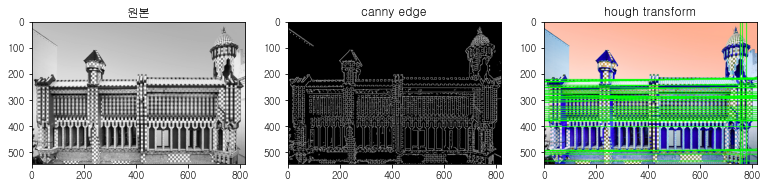

In [2]:
# 허프 변환 알고리즘
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt

#1.canny edge 검출
img = cv2.imread('./data/hough_example.jpg',0)
img_result = cv2.imread('./data/hough_example.jpg')
img_edge = cv2.Canny(img,300,400)

#2.hough transform 직선 검출

lines = cv2.HoughLines(img_edge,1,np.pi/180,200)
print(lines[0])

#3. 검출된 rho, theta로 직선 그리기
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho # x좌표가 rho * cos 이니까
        y0 = b*rho
        
        pt1= (int(x0+1000*(-b)),int(y0+1000*(a)) )# 직선의 시작은 영상의 처음 부분부터 
        pt2= (int(x0-1000*(-b)),int(y0-1000*(a)) )#영상의 끝까지 ? 
        
        cv2.line(img_result,pt1,pt2,(0,255,0),2)


fig =plt.figure(figsize=(13,13))

plt.subplot(331)
plt.imshow(img,'gray')
plt.title('원본')

plt.subplot(332)
plt.imshow(img_edge,'gray')
plt.title('canny edge')

plt.subplot(333)
plt.imshow(img_result)
plt.title('hough transform')

plt.show()


#threshold를 높여서, 비교적 덜 겹치는 세로선들은 많이 안나옴.

---
## RANSAC (Random sample consensus)

인라이어를 찾아, 모델을 적합 시키는 방법.

난수를 생성하여, 군집을 찾기에 임의성 지닌다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/ransac1.PNG" width="450" height="600">

y = ax+b 에서 a와 b를 추정해준다.

1. 난수를 생성하여 임의로 두 개의 샘플을 선택한다.
2. 두 점을 이용해서, a와 b를 계산한다.
3. y=ax+b와 오차 t안의 점들을, 인라이어에 추가.
4. 인라이어 수가 충분하지 않으면 모델을 버린다.
5. 채택된 모델은 다른 인라이어들과 적합오차를 계산해, 가장 좋은 모델을 찾는다.